In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Исходные данные для работы

X = np.array([5
     , 11
     , 15
     , 17
     , 20
     , 22
     , 25
     , 27
     , 30
     , 35])
Y = np.array([70
     , 65
     , 55
     , 60
     , 50
     , 35
     , 40
     , 30
     , 25
     , 32])

In [3]:
#X = np.log(X)

In [4]:
X.shape, Y.shape

((10,), (10,))

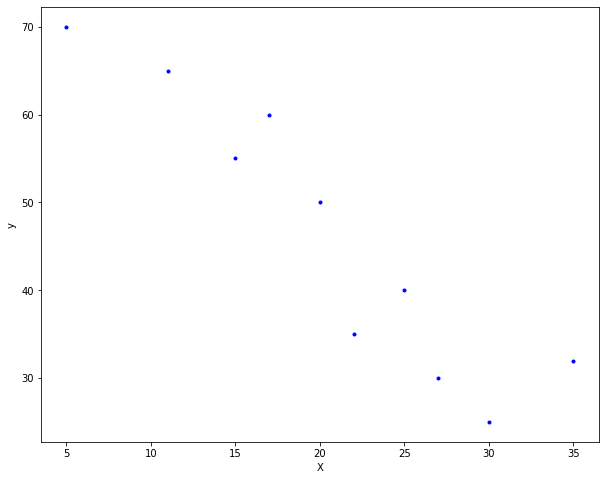

In [5]:
#Визуализация данных

plt.figure(figsize = (10,8))
plt.plot(X, Y, 'b.')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

In [6]:
#Для наождения оценок парной линейной регрессии воспользуемся методом наименьших квадратов
#в качестве функционала выберем F как функцию минимума квадратов остатков
#F = sum( Y - Ypred )**2 -> min
# или, если переписать, 
#F = sum( Y - (a*X + b) )**2 -> min

#для нахождения минимума этого функционала возьмем производные по каждому коэф
# dF/da = -2 * sum( Y - (a*X + b) ) * X
# dF/db = -2 * sum( Y - (a*X + b) )

#приравняем производные к 0 и запишем в виде системы, получаем систему линейных уравнений с 2-ме неизвестными 
# / -2 * sum( Y - (a*X + b) ) * X = 0 
#{
# \ -2 * sum( Y - (a*X + b) ) = 0 

#выразим из этой системы a, подставим во второе уравнение и выразим b
#получаем оценки a, b методом наименьших квадратов при функционале минимизации суммы квадратов остатков
n = len(X)

a = ( n*sum(X*Y)-(sum(X)*sum(Y)) ) / ( n*sum(X**2)-(sum(X)**2) )
b = 1/n * sum(Y) - 1/n * sum(X*a)

print('Найденные оценки регрессии методом МНК: a =', a, ', b = ', b)

Найденные оценки регрессии методом МНК: a = -1.6304023845007451 , b =  79.94932935916543


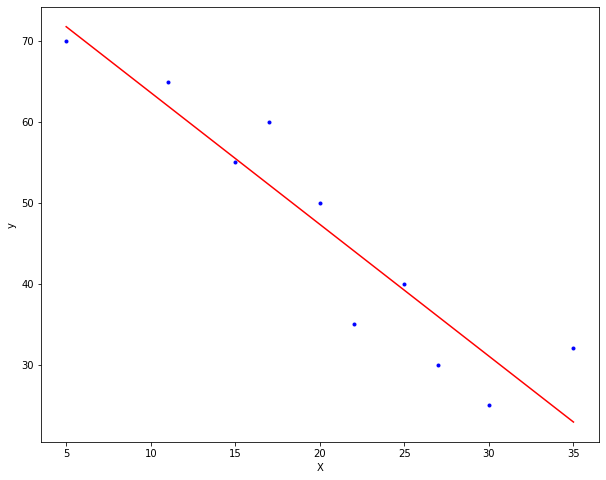

In [7]:
#построим график найденной прямой
plt.figure(figsize = (10,8))
plt.plot(X, Y, 'b.')
plt.plot(X, a*X + b, 'r')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

In [8]:
#расчитаем R^2 для нашей модели, чтобы оценить ее качество 
r_sq = 1 - ( sum((Y - (a*X+b))**2) ) / ( sum((Y-( sum(Y)/len(Y)) )**2) )
print('R^2 для оценок парной ререссии методом МНК равен: ', r_sq)

R^2 для оценок парной ререссии методом МНК равен:  0.8606888179979808


In [9]:
#теперь в качестве метода для нахождения оценок парной линейной регрессии 
#вместо метода аименьших квадратов будем использовать метод градиентного спуска
#функция потерь та же - ищем минимум остатков

In [10]:
#градиентный спуск 
#с критерием останова по количетву эпох

#(1)первым делом нам необходимо задать параметры количества эпох и размер шага
#(2)далее необходимо взять производную от нашего функционала (здесь - ф-я минимизации остатков)
#(3)берем произвольные коэфициенты a, b 
#(4)для них считаем Ypred
#(5)после чего подставляем Ypred в наши градиенты (производные)
#(6)обновляем коэффициенты a, b 

#(1)
n_epochs = 10000
alpha = 0.001

#(2)
n = len(X)
# F = 1/n * sum( Y - Ypred )**2 --> min
# F = 1/n * sum( Y - (a*X+b) )**2 --> min
# dF/da = -2/n * sum( Y - a*X - b ) * X
# dF/db = -2/n * sum( Y - a*X - b )

#(3)
a0 = 0
b0 = 0

for i in range(n_epochs):
    #(4)
    Y_pred = a0*X + b0 
    
    #(5)
    grad_a = -2/n * sum((Y - Y_pred) * X)
    grad_b = -2/n * sum(Y - Y_pred)
    
    #(6)
    a0 = a0 - alpha * grad_a
    b0 = b0 - alpha * grad_b

#считаем качество модели
r_sq_grd_ep = 1 - ( sum((Y - (a0*X+b0))**2) ) / ( sum((Y-( sum(Y)/len(Y)) )**2) )

#Результаты метода
print('Найденные оценки регрессии методом градиентного спуска с 10000 эпох и шагом в 0.001: a =', a0, ', b = ', b0)
print('R^2 для парной регрессии методом градиентного спуска с 10000 эпох и шагом в 0.001 равен: ', r_sq)

R^2 для парной регрессии методом градиентного спуска с 10000 эпох и шагом в 0.001 равен:  0.8606888179979808


-1.4553314053995463 75.70235009389802


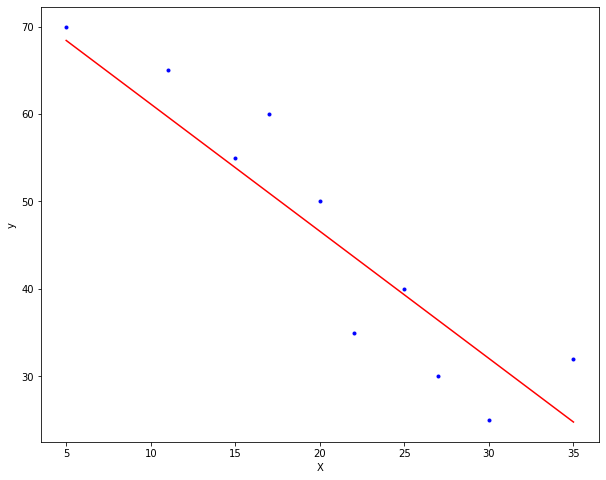

In [11]:
print(a0, b0)

#построим график найденной прямой
plt.figure(figsize = (10,8))
plt.plot(X, Y, 'b.')
plt.plot(X, a0*X + b0, 'r')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

In [12]:
#градиентный спуск 
#с критерием останова по точности

#в качестве критерия точности будем брать R^2
#разумно просить от метода точности не хуже, чем от метода МНК

#(1)первым делом нам необходимо задать параметры размера шага
#(2)далее необходимо взять производную от нашего функционала (здесь - ф-я минимизации остатков)
#(3)берем произвольные коэфициенты a, b 
#(4)для них считаем Ypred
#(5)после чего подставляем Ypred в наши градиенты (производные)
#(6)проверяем качество модели
#(7)если качество ниже, обновляем коэффициенты a, b 


#(1)
alpha = 0.001

#(2)
n = len(X)
# F = 1/n * sum( Y - Ypred )**2 --> min
# F = 1/n * sum( Y - (a*X+b) )**2 --> min
# dF/da = -2/n * sum( Y - a*X - b ) * X
# dF/db = -2/n * sum( Y - a*X - b )

#(3)
a0 = 0
b0 = 0

#R^2 методом МНК (округлим до сотых)
r_sq_mls = round(1 - ( sum((Y - (a*X+b))**2) ) / ( sum((Y-( sum(Y)/len(Y)) )**2) ), 2)

while 1 - ( sum((Y - (a0*X+b0))**2) ) / ( sum((Y-( sum(Y)/len(Y)) )**2) ) < r_sq_mls:
    #(4)
    Y_pred = a0*X + b0 
    
    #(5)
    grad_a = -2/n * sum((Y - Y_pred) * X)
    grad_b = -2/n * sum(Y - Y_pred)
    
    #(6)
    a0 = a0 - alpha * grad_a
    b0 = b0 - alpha * grad_b

r_sq_gr_acc = 1 - ( sum((Y - (a0*X+b0))**2) ) / ( sum((Y-( sum(Y)/len(Y)) )**2) )


#Результаты метода
print('Найденные оценки регрессии методом градиентного спуска по точности: a =', a0, ', b = ', b0)
print('R^2 для парной регрессии методом градиентного спуска заданной точностью: ', r_sq_gr_acc)

Найденные оценки регрессии методом градиентного спуска по точности: a = -1.5877953508069858 , b =  78.91574178468029
R^2 для парной регрессии методом градиентного спуска заданной точностью:  0.8600001844862272


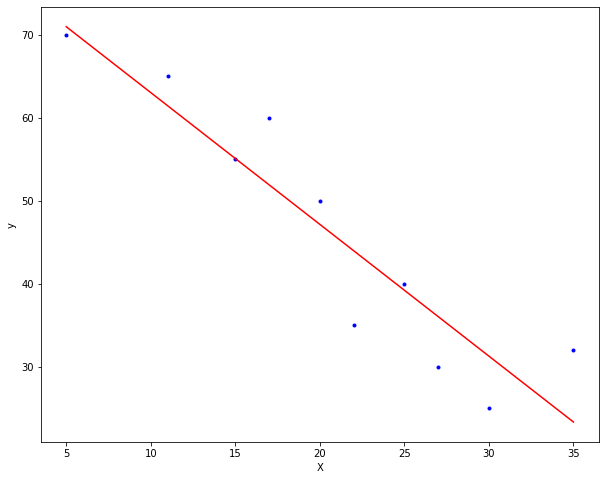

In [13]:
#построим график найденной прямой
plt.figure(figsize = (10,8))
plt.plot(X, Y, 'b.')
plt.plot(X, a0*X + b0, 'r')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

In [17]:
#попробую сделать одну функцию для расчета разных методов

def get_params_for_regr(X, Y, graph=True, method='OLS'
                       #параметры для МНК отсутсвуют
                        
                        #параметры для grad_decent
                        , alpha = 0.001
                        #по эпохам
                       , n_epochs = 10000
                        #параметры по точности
                       , accuracy=0):
    
    n = len(X)
    
    
    
    if method == 'OLS': #Ordinary Least Squares - метод МНК
        
        #найдем оценки регрессии 
        a = ( n*sum(X*Y)-(sum(X)*sum(Y)) ) / ( n*sum(X**2)-(sum(X)**2) )
        b = 1/n * sum(Y) - 1/n * sum(X*a)
        print('Найденные оценки регрессии методом МНК: a =', a, ', b = ', b)
        
        #посчитаем R^2
        r_sq = 1 - ( sum((Y - (a*X+b))**2) ) / ( sum((Y-( sum(Y)/len(Y)) )**2) )
        print('R^2 для оценок парной ререссии методом МНК равен: ', r_sq)
        
        #построим график
        if graph == True:
            plt.figure(figsize = (10,8))
            plt.plot(X, Y, 'b.')
            plt.plot(X, a*X + b, 'r')
            plt.xlabel('X')
            plt.ylabel('y')
            plt.show()
        return(a, b, r_sq)
    
    
    if method == 'GRD_Ep': #Gradient Decent with constant epoch number - метод град. спуска с зад. кол-вом эпох
        
        n_epochs = n_epochs
        alpha = alpha
        a = 0
        b = 0

        for i in range(n_epochs):
            #(4)
            Y_pred = a*X + b

            #(5)
            grad_a = -2/n * sum((Y - Y_pred) * X)
            grad_b = -2/n * sum(Y - Y_pred)

            #(6)
            a = a - alpha * grad_a
            b = b - alpha * grad_b

        #считаем качество модели
        r_sq_grd_ep = 1 - ( sum((Y - (a*X+b))**2) ) / ( sum((Y-( sum(Y)/len(Y)) )**2) )

        #Результаты метода
        print('Найденные оценки регрессии методом градиентного спуска с ', n_epochs, ' эпох и шагом в ', alpha, ': a =', a, ', b = ', b)
        print('R^2 для парной регрессии методом градиентного спуска с ', n_epochs, ' эпох и шагом в ', alpha, ' равен: ', r_sq_grd_ep)
        
        #построим график
        if graph == True:
            plt.figure(figsize = (10,8))
            plt.plot(X, Y, 'b.')
            plt.plot(X, a*X + b, 'r')
            plt.xlabel('X')
            plt.ylabel('y')
            plt.show()
        return(a, b, r_sq_grd_ep)


    
    if method == 'GRD_Acc': #Gradient Decent with constant accuracy - метод град. спуска с зад. точностью
        alpha = alpha
        a = 0
        b = 0



        while 1 - ( sum((Y - (a*X+b))**2) ) / ( sum((Y-( sum(Y)/len(Y)) )**2) ) < accuracy:
            #(4)
            Y_pred = a*X + b

            #(5)
            grad_a = -2/n * sum((Y - Y_pred) * X)
            grad_b = -2/n * sum(Y - Y_pred)

            #(6)
            a = a - alpha * grad_a
            b = b - alpha * grad_b

        r_sq_gr_acc = 1 - ( sum((Y - (a*X+b))**2) ) / ( sum((Y-( sum(Y)/len(Y)) )**2) )

        #Результаты метода
        print('Найденные оценки регрессии методом градиентного спуска по точности: a =', a, ', b = ', b)
        print('R^2 для парной регрессии методом градиентного спуска заданной точностью: ', r_sq_gr_acc)
        
        #построим график
        if graph == True:
            plt.figure(figsize = (10,8))
            plt.plot(X, Y, 'b.')
            plt.plot(X, a*X + b, 'r')
            plt.xlabel('X')
            plt.ylabel('y')
            plt.show()
        return(a, b, r_sq_gr_acc)

In [20]:
#попробую воспользоваться фунцией и посчитать метод град спуска по точности больший, чем МНК

a, b, r = get_params_for_regr(X, Y, graph=False, method='OLS' , alpha = 0.001 , n_epochs = 10000 , accuracy=0)

Найденные оценки регрессии методом МНК: a = -1.6304023845007451 , b =  79.94932935916543
R^2 для оценок парной ререссии методом МНК равен:  0.8606888179979808


In [23]:
r

0.8606888179979808